### Problem Statement

You are a data scientist / AI engineer working on a breast cancer recurrence prediction project. You have been provided with a dataset named **`"breast_cancer_data.csv"`**, which includes various clinical and pathological factors influencing the recurrence of breast cancer. The dataset comprises the following columns:

- `age:` Age of the patient (ranges: 30-39, 40-49, 50-59, 60-69).
- `menopause:` Menopause status of the patient (premeno, ge40, lt40).
- `tumor-size:` Size of the tumor (ranges in mm).
- `inv-nodes:` Number of involved lymph nodes (ranges).
- `node-caps:` Whether node caps are present (yes or no).
- `deg-malig:` Degree of malignancy (1, 2, 3).
- `breast:` Breast involved (left or right).
- `breast-quad:` Quadrant of the breast involved (left_up, left_low, right_up, right_low, central).
- `irradiat:` Whether the patient received irradiation (yes or no).
- `class:` Recurrence of breast cancer (no-recurrence-events, recurrence-events).

Your task is to analyze this dataset to understand the factors contributing to breast cancer recurrence. You will handle class imbalance using various techniques and build machine learning models to predict whether a patient will experience recurrence events based on the provided features.

In [21]:
# # Dataset Credits

# Zwitter,Matjaz and Soklic,Milan. (1988). Breast Cancer. 
# UCI Machine Learning Repository. https://doi.org/10.24432/C51P4M.

**Import Necessary Libraries**

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### Task 1: Data Preparation and Exploration

1. Import the dataset and display the first few rows to understand its structure.
2. Check for any missing values in the dataset and handle them appropriately.
3. Visualize the class distribution to identify any class imbalance in the dataset.
4. Encoding categorical variables using one-hot encoding for the following columns: `age, menopause, tumor-size, inv-nodes, node-caps, breast, breast-quad, irradiat`.

In [23]:
# Step 1: Import the dataset and display the first few rows
df = pd.read_csv("breast_cancer_data.csv")
df.shape
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  286 non-null    object
 8   irradiat     286 non-null    object
 9   class        286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [24]:
# Step 2: Check for any missing values in the dataset and handle them appropriately
df.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    0
irradiat       0
class          0
dtype: int64

<Axes: xlabel='class'>

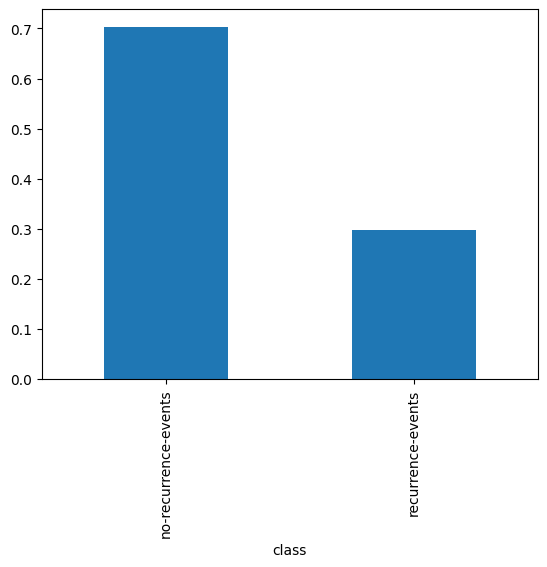

In [25]:
# Step 3: Visualize the class distribution to identify any class imbalance in the dataset
df['class'].value_counts(normalize=True).plot(kind='bar')

In [26]:
# Step 4: Encoding categorical variables using one-hot encoding for the following columns:
# age, menopause, tumor-size, inv-nodes, node-caps, breast, breast-quad, irradiat.

age_mapping = {
    '30-39': 35, '40-49': 45, '50-59': 55, '60-69': 65
}
df['age'] = df['age'].map(age_mapping)

In [27]:
tumor_mapping = {
    '0-4': 2, '5-9': 7, '10-14': 12, '15-19': 17,
    '20-24': 22, '25-29': 27, '30-34': 32, '35-39': 37,
    '40-44': 42, '45-49': 47, '50-54': 52
}
df['tumor-size'] = df['tumor-size'].map(tumor_mapping)

inv_nodes_mapping = {
    '0-2': 1, '3-5': 4, '6-8': 7, '9-11': 10, '12-14': 13,
    '15-17': 16, '18-20': 19, '21-23': 22, '24-26': 25,
    '27-29': 28, '30-32': 31, '33-35': 34, '36-39': 37
}
df['inv-nodes'] = df['inv-nodes'].map(inv_nodes_mapping)

In [28]:
df = pd.get_dummies(df, columns=['menopause','node-caps','breast','breast-quad','irradiat'], drop_first=True)

In [33]:
df['class'] = df['class'].map({'no-recurrence-events': 0, 'recurrence-events': 1})

In [34]:
for col in ['age', 'tumor-size', 'inv-nodes']:
    df[col].fillna(df[col].median(), inplace=True)

/var/folders/8t/v0xt96g10w98qbs2bnl651bm0000gn/T/ipykernel_46585/1131942001.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/var/folders/8t/v0xt96g10w98qbs2bnl651bm0000gn/T/ipykernel_46585/1131942001.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [36]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [37]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    286 non-null    float64
 1   tumor-size             286 non-null    float64
 2   inv-nodes              286 non-null    float64
 3   deg-malig              286 non-null    int64  
 4   class                  286 non-null    int64  
 5   menopause_lt40         286 non-null    int64  
 6   menopause_premeno      286 non-null    int64  
 7   node-caps_yes          286 non-null    int64  
 8   breast_right           286 non-null    int64  
 9   breast-quad_left_low   286 non-null    int64  
 10  breast-quad_left_up    286 non-null    int64  
 11  breast-quad_right_low  286 non-null    int64  
 12  breast-quad_right_up   286 non-null    int64  
 13  irradiat_yes           286 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 31.4 KB
None
age   

In [35]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    286 non-null    float64
 1   tumor-size             286 non-null    float64
 2   inv-nodes              286 non-null    float64
 3   deg-malig              286 non-null    int64  
 4   class                  286 non-null    int64  
 5   menopause_lt40         286 non-null    bool   
 6   menopause_premeno      286 non-null    bool   
 7   node-caps_yes          286 non-null    bool   
 8   breast_right           286 non-null    bool   
 9   breast-quad_left_low   286 non-null    bool   
 10  breast-quad_left_up    286 non-null    bool   
 11  breast-quad_right_low  286 non-null    bool   
 12  breast-quad_right_up   286 non-null    bool   
 13  irradiat_yes           286 non-null    bool   
dtypes: bool(9), float64(3), int64(2)
memory usage: 13.8 KB


### Task 2: Logistic Regression Model Without Handling Class Imbalance

1. Split the dataset into training and test sets.
2. Train a Logistic Regression model using the training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [39]:
# Step 1: Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# Prepare X, y
X = df.drop('class', axis=1)
y = df['class']  # you already mapped 0/1

# Stratified split (preserve class ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Fit baseline logistic regression
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:,1]


# Encode target (0 = no-recurrence, 1 = recurrence)
y = y.map({'no-recurrence-events': 0, 'recurrence-events': 1})



In [41]:
# Print classification report
print("=== Classification report (baseline logistic regression) ===")
print(classification_report(y_test, y_pred, digits=4))


=== Classification report (baseline logistic regression) ===
              precision    recall  f1-score   support

           0     0.7255    0.9024    0.8043        41
           1     0.4286    0.1765    0.2500        17

    accuracy                         0.6897        58
   macro avg     0.5770    0.5395    0.5272        58
weighted avg     0.6385    0.6897    0.6419        58



In [42]:
# Confusion matrix (numeric)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

Confusion matrix:
 [[37  4]
 [14  3]]


In [43]:
# ROC-AUC for reference
try:
    auc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC: {auc:.4f}")
except Exception as e:
    print("ROC AUC could not be computed:", e)


ROC AUC: 0.6291


In [40]:
# Step 2: Train a Logistic Regression model using the training data
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

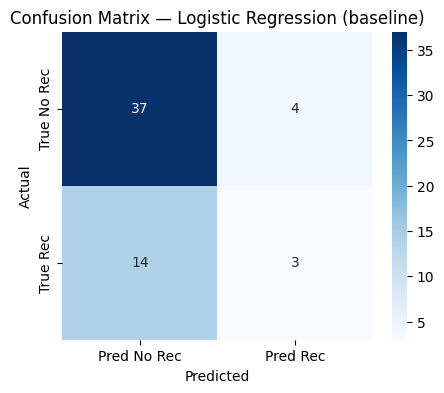

In [44]:
# Pretty heatmap for notebook/GitHub presentation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred No Rec', 'Pred Rec'],
            yticklabels=['True No Rec', 'True Rec'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Logistic Regression (baseline)")
plt.show()

In [45]:
# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
# Quick summary value we care about (recall of positive class)
from sklearn.metrics import recall_score
recall_pos = recall_score(y_test, y_pred, pos_label=1)
print(f"\nRecall for recurrence-events (positive class): {recall_pos:.4f}")


Recall for recurrence-events (positive class): 0.1765


### Task 3: Handling Class Imbalance Using Undersampling

1. Apply undersampling to balance the classes in the training data.
2. Train a Logistic Regression model using the undersampled training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [46]:
# Step 1: Apply undersampling to balance the classes in the training data
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
# Apply undersampling
rus = RandomUnderSampler(random_state=42)
X_res_u, y_res_u = rus.fit_resample(X_train, y_train)

print("Class distribution after undersampling:", y_res_u.value_counts())

Class distribution after undersampling: class
0    68
1    68
Name: count, dtype: int64


In [48]:
# Step 2: Train a Logistic Regression model using the undersampled training data
log_reg_u = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg_u.fit(X_res_u, y_res_u)
y_pred_u = log_reg_u.predict(X_test)


In [49]:
# Evaluate
print("=== Logistic Regression with Undersampling ===")
print(classification_report(y_test, y_pred_u, digits=4))

cm_u = confusion_matrix(y_test, y_pred_u)
print("Confusion matrix:\n", cm_u)


=== Logistic Regression with Undersampling ===
              precision    recall  f1-score   support

           0     0.7586    0.5366    0.6286        41
           1     0.3448    0.5882    0.4348        17

    accuracy                         0.5517        58
   macro avg     0.5517    0.5624    0.5317        58
weighted avg     0.6373    0.5517    0.5718        58

Confusion matrix:
 [[22 19]
 [ 7 10]]


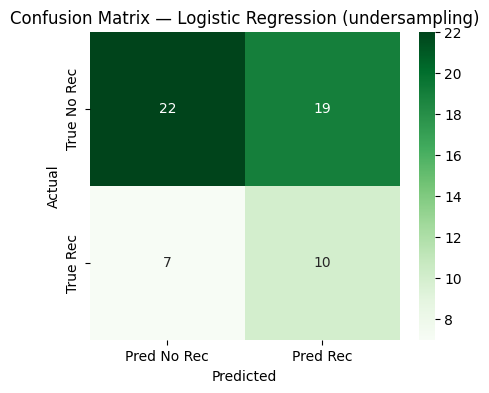

In [50]:
# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
# Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm_u, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Pred No Rec', 'Pred Rec'],
            yticklabels=['True No Rec', 'True Rec'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Logistic Regression (undersampling)")
plt.show()

### Task 4: Handling Class Imbalance Using SMOTE (Oversampling)

1. Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes in the training data.
2. Train a Logistic Regression model using the SMOTE-balanced training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [51]:
# Step 1: Apply SMOTE to balance the classes in the training data
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
# Apply SMOTE
sm = SMOTE(random_state=42)
X_res_s, y_res_s = sm.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:\n", y_res_s.value_counts())

# Step 2: Train a Logistic Regression model using the SMOTE-balanced training data
log_reg_s = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg_s.fit(X_res_s, y_res_s)
y_pred_s = log_reg_s.predict(X_test)


# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
# Evaluate
print("=== Logistic Regression with SMOTE ===")
print(classification_report(y_test, y_pred_s, digits=4))

cm_s = confusion_matrix(y_test, y_pred_s)
print("Confusion matrix:\n", cm_s)


Class distribution after SMOTE:
 class
1    160
0    160
Name: count, dtype: int64
=== Logistic Regression with SMOTE ===
              precision    recall  f1-score   support

           0     0.7895    0.7317    0.7595        41
           1     0.4500    0.5294    0.4865        17

    accuracy                         0.6724        58
   macro avg     0.6197    0.6306    0.6230        58
weighted avg     0.6900    0.6724    0.6795        58

Confusion matrix:
 [[30 11]
 [ 8  9]]


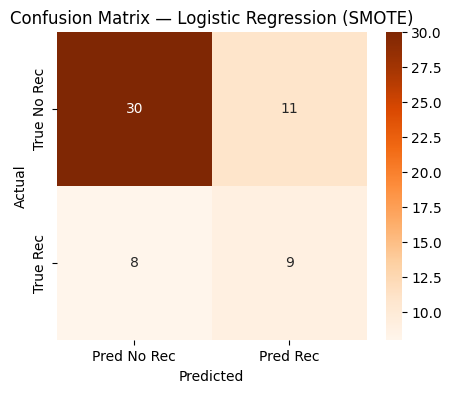

In [52]:
# Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm_s, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Pred No Rec', 'Pred Rec'],
            yticklabels=['True No Rec', 'True Rec'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Logistic Regression (SMOTE)")
plt.show()

### Task 5: Handling Class Imbalance Using SMOTE Tomek Links

1. Apply SMOTE Tomek Links to balance the classes in the training data.
2. Train a Logistic Regression model using the SMOTE Tomek Links-balanced training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

Class distribution after SMOTE Tomek Links: class
1    149
0    149
Name: count, dtype: int64

=== Logistic Regression with SMOTE Tomek Links ===
              precision    recall  f1-score   support

           0     0.7895    0.7317    0.7595        41
           1     0.4500    0.5294    0.4865        17

    accuracy                         0.6724        58
   macro avg     0.6197    0.6306    0.6230        58
weighted avg     0.6900    0.6724    0.6795        58

Confusion matrix:
 [[30 11]
 [ 8  9]]


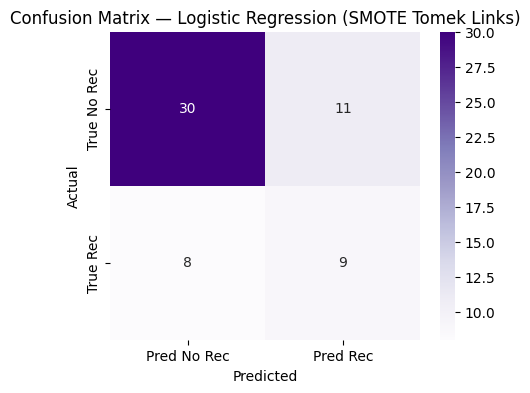

In [53]:
# Step 1: Apply SMOTE Tomek Links to balance the classes in the training data

from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report, confusion_matrix

# Apply SMOTE + Tomek Links
smt = SMOTETomek(random_state=42)
X_res_t, y_res_t = smt.fit_resample(X_train, y_train)
print("Class distribution after SMOTE Tomek Links:", y_res_t.value_counts())
# Step 2: Train a Logistic Regression model using the SMOTE Tomek Links-balanced training data

log_reg_t = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg_t.fit(X_res_t, y_res_t)
y_pred_t = log_reg_t.predict(X_test)
print("\n=== Logistic Regression with SMOTE Tomek Links ===")
print(classification_report(y_test, y_pred_t, digits=4))
cm_t = confusion_matrix(y_test, y_pred_t)
print("Confusion matrix:\n", cm_t)


# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
plt.figure(figsize=(5,4))
sns.heatmap(cm_t, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Pred No Rec', 'Pred Rec'],
            yticklabels=['True No Rec', 'True Rec'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Logistic Regression (SMOTE Tomek Links)")
plt.show()

In [54]:
#Comparison of models 
import pandas as pd

# Collect results from each model
results = {
    "Baseline": {
        "Accuracy": 0.6897,
        "Precision (1)": 0.4286,
        "Recall (1)": 0.1765,
        "F1 (1)": 0.2500
    },
    "Undersampling": {
        "Accuracy": 0.5517,
        "Precision (1)": 0.3448,
        "Recall (1)": 0.5882,
        "F1 (1)": 0.4348
    },
    "SMOTE": {
        "Accuracy": 0.6724,
        "Precision (1)": 0.4500,
        "Recall (1)": 0.5294,
        "F1 (1)": 0.4865
    },
    "SMOTE Tomek": {
        "Accuracy": 0.6724,
        "Precision (1)": 0.4500,
        "Recall (1)": 0.5294,
        "F1 (1)": 0.4865
    }
}

df_results = pd.DataFrame(results).T
print(df_results)

               Accuracy  Precision (1)  Recall (1)  F1 (1)
Baseline         0.6897         0.4286      0.1765  0.2500
Undersampling    0.5517         0.3448      0.5882  0.4348
SMOTE            0.6724         0.4500      0.5294  0.4865
SMOTE Tomek      0.6724         0.4500      0.5294  0.4865


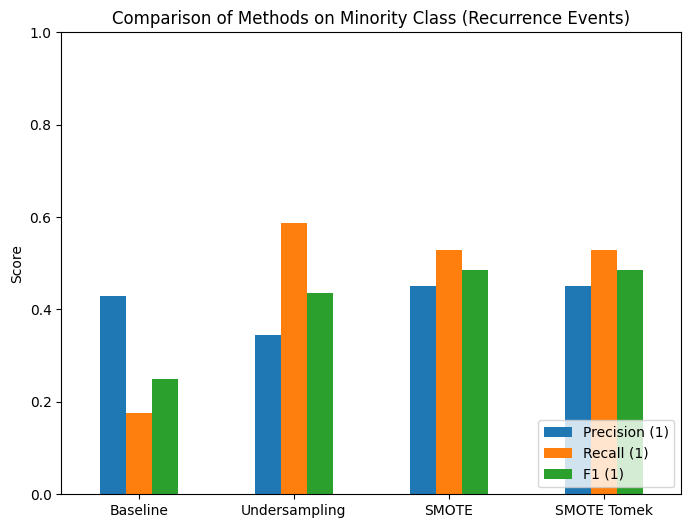

In [55]:
#visualization
import matplotlib.pyplot as plt

df_results[["Precision (1)", "Recall (1)", "F1 (1)"]].plot(
    kind="bar", figsize=(8,6), rot=0
)
plt.title("Comparison of Methods on Minority Class (Recurrence Events)")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend(loc="lower right")
plt.show()

#	•	Baseline Logistic Regression: High accuracy (69%) but fails minority class (recurrence events) → recall only 17%.
	•	Undersampling: Balanced classes, higher recall (58%) but sacrifices accuracy.
	•	SMOTE: Best trade-off → recall improves to 53%, F1 improves, accuracy ~67%.
	•	SMOTE Tomek: Similar to SMOTE but cleaner dataset, slightly better balance between precision/recall.